In [ ]:
""" Data distribution, adapted from Elements of Data Science, Allen Downey """

In [4]:
"""`empiricaldist` provides an object type called `Pmf`, which stands for "probability mass function".
A `Pmf` object contains a set of possible outcomes and their probabilities.
For example, here's a `Pmf` that represents the outcome of rolling a six-sided die:
"""

from empiricaldist import Pmf
import matplotlib.pyplot as plt

outcomes = [1,2,3,4,5,6]
die = Pmf(1/6, outcomes)

In [ ]:
import os
os.getcwd()

In [ ]:
"""We'll use `Pmf` objects to represent distributions of values from a new dataset, the General Social Survey (GSS).
The GSS surveys a representative sample of adult residents of the U.S. and asks questions about demographics, and beliefs about social and political issues.
"""

data_file = 'Data/gss_extract_2022.hdf'
import pandas as pd

gss = pd.read_hdf(data_file, 'gss')
print(gss.shape)
print(gss.head())

In [ ]:
"""
when we make a `Pmf`, we want to know the *fraction* of respondents with each value, rather than the counts.
We can do that by setting `normalize=True`.
Then we get a **normalized** `Pmf`, which means that the fractions add up to 1.
Let's look at the `year` column in the `DataFrame`, which represents the year each respondent was interviewed.
Make an unnormalized `Pmf` for `year` and plot the result as a bar chart.
"""
year = gss['year']
pmf_year = Pmf.from_seq(year, normalize=False) # counts
pmf_year.bar(label='year')
print(pmf_year[2022])

In [ ]:
age = gss['age']
pmf_age = Pmf.from_seq(age)
pmf_age.plot()

plt.xlabel('Age (years)')
plt.ylabel('PMF')
plt.title('Distribution of age');

In [ ]:
"""
CDF Cumulative Distribution Functions
If we compute the cumulative sum of a PMF, the result is a cumulative distribution function (CDF).
"""
values = 1, 2, 2, 3, 5
pmf = Pmf.from_seq(values)
print(pmf)
cdf = pmf.make_cdf()
print(cdf)

In [ ]:
"""
## CDF of Age
"""

"""`empiricaldist` provides a `Cdf.from_seq` function that takes any kind of sequence and computes the CDF of the values."""

from empiricaldist import Cdf

cdf_age = Cdf.from_seq(age)

"""The result is a `Cdf` object, which provides a method called `plot` that plots the CDF as a line."""

cdf_age.plot()

plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.title('Distribution of age');

In [ ]:
"""`q` stands for "quantity", which is another name for a value in a distribution.
`p` stands for probability, which is the result.
In this example, the quantity is age 51, and the corresponding probability is about 0.62.
That means that about 62% of the respondents are age 51 or younger.
"""
q = 51
p = cdf_age(q)
print(p)
def draw_line(p, q, x):
    xs = [q, q, x]
    ys = [0, p, p]
    plt.plot(xs, ys, ':', color='gray')

def draw_arrow_left(p, q, x):
    dx = 3
    dy = 0.025
    xs = [x+dx, x, x+dx]
    ys = [p-dy, p, p+dy]
    plt.plot(xs, ys, ':', color='gray')

def draw_arrow_down(p, q, y):
    dx = 1.25
    dy = 0.045
    xs = [q-dx, q, q+dx]
    ys = [y+dy, y, y+dy]
    plt.plot(xs, ys, ':', color='gray')

cdf_age.plot()
x = 17
draw_line(p, q, x)
draw_arrow_left(p, q, x)

plt.xlabel('Age (years)')
plt.xlim(x-1, 91)
plt.ylabel('CDF')
plt.title('Distribution of age');


In [ ]:
"""The CDF is an invertible function, which means that if you have a probability, `p`,
you can look up the corresponding quantity, `q`.
The `Cdf` object provides a method called `inverse` that computes the inverse of the cumulative distribution function.
We look up the probability 0.25 and the result is 32.
That means that 25% of the respondents are age 32 or less.
Another way to say the same thing is "age 32 is the 25th percentile of this distribution".
"""

p1 = 0.25
q1 = cdf_age.inverse(p1)
print(q1)
cdf_age.plot()

p2 = 0.75
q2 = cdf_age.inverse(p2)
print(q2)

x = 17
draw_line(p1, q1, x)
draw_arrow_down(p1, q1, 0)

draw_line(p2, q2, x)
draw_arrow_down(p2, q2, 0)

plt.xlabel('Age (years)')
plt.xlim(x-1, 91)
plt.ylabel('CDF')
plt.title('Distribution of age');


In [ ]:
"""
As an example, the numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; 
that is, every value in the range should have the same probability.
Lets generate 1000 numbers from numpy.random.random and compare the plots of PMF and CDF.
"""

1000


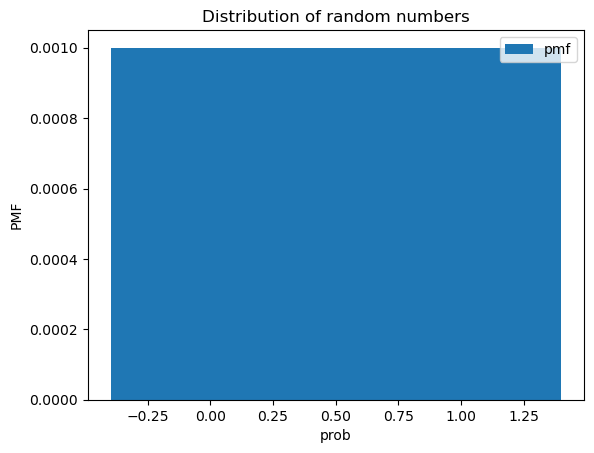

In [5]:
import numpy as np
x = np.random.random()
numlist = []
for i in range(1000):
    numlist.append(np.random.random())
print(len(numlist))

pmft = Pmf.from_seq(numlist, normalize=True)
pmft.bar(label='pmf')
plt.xlabel('prob')
plt.ylabel('PMF')
plt.title('Distribution of random numbers')
plt.legend();

In [ ]:
"""
CDF plot shows the distribution is uniform
"""
cdfn = Cdf.from_seq(numlist)
cdfn.plot()
plt.xlabel('cumulative')
plt.ylabel('CDF')
plt.title('Distribution of random numbers')
plt.legend();